In [37]:
import pandas as pd
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import copy
%matplotlib inline

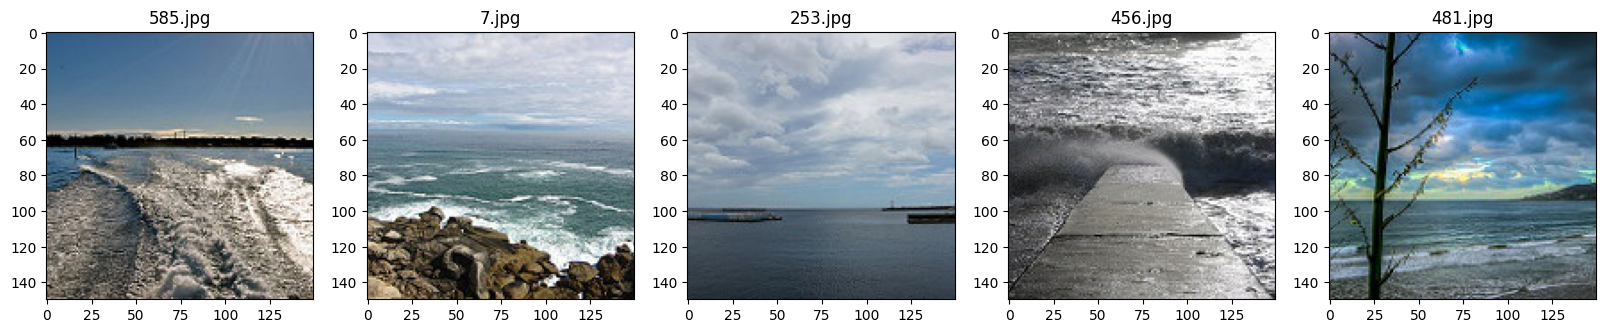

In [38]:
plt.figure(figsize=(20,20))
image_folder = r"D:\\SWETHA\\LEARNING\\custom-dataset\\intel-dataset\\test\\sea"
for i in range(5):
    file = np.random.choice(os.listdir(image_folder))
    image_path = os.path.join(image_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.set_title(label = file)
    plt.imshow(img)

In [39]:
img_width = 200
img_height = 200
train_image_folder = r"D:\\SWETHA\\LEARNING\\custom-dataset\\intel-dataset\\train\\"
test_image_folder = r"D:\\SWETHA\\LEARNING\\custom-dataset\\intel-dataset\\test\\"


In [40]:
def create_dataset(image_folder):
    image_data = []
    classes = []
    for dir in os.listdir(image_folder):
        for file in os.listdir(os.path.join(image_folder, dir)):
            image_path = os.path.join(image_folder, dir, file)
            image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)   # read image as RGB image
            image = cv2.resize(image, (img_height, img_width))  #resize the image to a standard format
            image = np.array(image)/ 255  #normalize the image 
            image_data.append(image)
            classes.append(dir)
    return image_data, classes

x_train_images, y_train_classes = create_dataset(train_image_folder)
x_test_images, y_test_classes = create_dataset(test_image_folder) 

In [41]:
 # create a dictionary for all the unique values for the classes
target_dict={k: v for v, k in enumerate(np.unique(y_train_classes))}
# convert data name to numbers 
x_train = np.array(x_train_images)
x_test = np.array(x_test_images)
y_train=  np.array([target_dict[y_train_classes[i]] for i in range(len(y_train_classes))]).reshape(1, len(y_train_classes))
y_test = np.array([target_dict[y_test_classes[i]] for i in range(len(y_test_classes))]).reshape(1, len(y_test_classes))
print(len(x_train), len(y_train), len(x_test), len(y_test))

1035 1 200 1


y = 0.it is a mountain picture


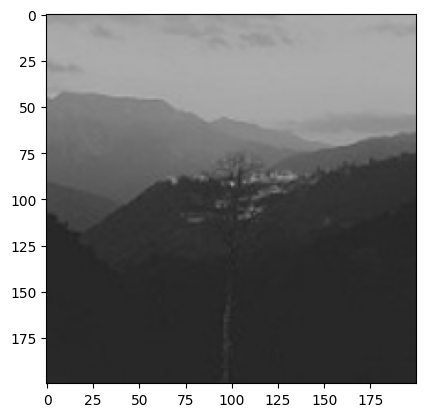

In [42]:
index = 99
plt.imshow(x_train[index])
# print ("y = " + str(y_train[index])+ ". It's a " + train_dict[y_train[index]] +  " picture.")
print("y = " + str(y_train[0][index]) + ".it is a " + str(list(target_dict.keys())[list(target_dict.values()).index(y_train[0][index])]) + " picture")

In [43]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]
print(f" Number of training examples are {m_train}")
print(f"Number of testing examples are {m_test}")
print(f"Image size is of {x_train.shape[1]}, {x_train.shape[2]}, {x_train.shape[3]}")
print(f"train_x shape is {x_train.shape}")
print(f"train_y shape is {y_train.shape}")
print(f"test_x shape is {x_test.shape}")
print(f"test_y shape is {y_test.shape}")

 Number of training examples are 1035
Number of testing examples are 200
Image size is of 200, 200, 3
train_x shape is (1035, 200, 200, 3)
train_y shape is (1, 1035)
test_x shape is (200, 200, 200, 3)
test_y shape is (1, 200)


In [44]:
train_x_flatten = x_train.reshape(x_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
train_x = train_x_flatten/ 255
test_x_flatten = x_train.reshape(x_test.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x = test_x_flatten/ 255
print(f'train x shape = {train_x_flatten.shape}')
print(f'test x shape = {test_x_flatten.shape}')

train x shape = (120000, 1035)
test x shape = (621000, 200)


In [45]:
nx = train_x_flatten.shape[0]  
nh = 7
ny = 1
layers_dims = (nx, nh, ny)
learning_rate = 0.0075

In [46]:
# function to initialize parameters 
def initialize_parameters(nx, nh, ny):
    # nx - number of units in the input layer (value of image shape after flattening)
    # nh = number of units in the hidden layer (considered as 7)
    # ny = number of units in the output layer (1 since it needs to predict yes or no (is a mountain or not))
    parameters = {}
    w1 = np.random.randn(nh, nx) * 0.001
    b1 = np.zeros((nh, 1))
    w2 = np.random.randn(ny, nh) * 0.001
    b2 = np.zeros((ny, 1))
    parameters= {'w1': w1, "b1": b1, "w2": w2, "b2": b2}
    return parameters
parameters = initialize_parameters(nx, nh, ny)
w1 = parameters["w1"]
b1 = parameters["b1"]
w2 = parameters["w2"]
b2 = parameters["b2"]
print(f" w1 shape: {w1.shape}, b1 shape: {b1.shape}, w2 shape: {w2.shape}, b2 shape: {b2.shape}" )

 w1 shape: (7, 120000), b1 shape: (7, 1), w2 shape: (1, 7), b2 shape: (1, 1)


In [47]:
# function for forward propagation
def sigmoid(x):
    sigmoid_ = 1/ (1+ np.exp(-x))
    return sigmoid_

def forward_propagation(a, w, b, activation):
    '''w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"] '''
    # z1 = w1*x + b1
    # a1 = activation(z1)
    z = np.dot(w, a)+ b
    print(f'the dimensions are :- z:{np.shape(z)}, w: {np.shape(w)}, a = {np.shape(a)}, b = {np.shape(b)}')
    if activation == "tanh":
        a = np.tanh(z)
    if activation == "sigmoid":
        a = sigmoid(z)
    '''a = np.tanh(z)   # tanh function is used as activation function in hidden layer and sigmoid function is used as activation function in output layer
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)'''

    # assert(a2.shape == (1, X.shape[1]))  # this line is used to confirm if the shape of a2 is equal to number of training examples. if it is not equal, an assertion error will be thrown
    
    values_ = {"z": z, "a": a, "w": w, "b": b} #, "z2": z2, "a2": a2}  # save these  values in this dictionary so that it can be used during back propagation
    return a, values_

In [48]:
# function to compute cost
Y = np.transpose(y_train)

def compute_cost(a2, Y):
    m = Y.shape[1] # denotes the number of training examples 
    # yhat = a2 -> sigmoid output of second activation
    cost = - (np.sum(np.multiply(Y, np.log(a2)) + np.multiply(1-Y,np.log(1-a2) ))) / m
    return cost

In [49]:
def backward_propagation(dz, values, activation):
    # da1, dw2, db2
    a_prev = values["a"]
    w = values["w"]
    b = values["b"]

    n = a_prev.shape[0]
    dw = np.dot(dz,np.transpose(a_prev)) * 1/n
    # dw = np.dot(dz, a_prev) * 1/n
    print(f'dw shape= {np.shape(dw)}')
    db = np.sum(dz, axis =1, keepdims=True) *1/n
    if activation == "tanh":
        da_prev = 1-np.power(dz, 2)
    if activation == "sigmoid":
        da_prev = sigmoid(dz) * (1-sigmoid(dz))
    
    return da_prev, dw, db

In [50]:
# function to update parameters:
def update_parameters(parameters, derivatives, learning_rate = 1.2):
    w1 = copy.deepcopy(parameters["w1"]) 
    b1 = parameters["b1"]
    w2 = copy.deepcopy(parameters["w2"])
    b2 = parameters["b2"]

    dw1 = derivatives["dw1"]
    db1 = derivatives["db1"]
    dw2 = derivatives["dw2"]
    db2 = derivatives["db2"]

    # update parameters with derivatives 
    print(np.shape(w1), learning_rate, np.shape(dw1))
    w1 = w1 - learning_rate * dw1

    b1 = b1- learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    # updated parameters
    parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}
    return parameters


In [51]:
layer_dims = (nx, 7, 1)
learning_rate = 0.0075

In [53]:
def two_layer_model(X, Y, layer_dims, learning_rate, n_iterations):
    derivatives = {}
    costs = []
    # nx = X.shape[0]
    # X = X.T
    (nx, nh, ny) = layer_dims
    parameters = initialize_parameters(nx, nh, ny)
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    # print("The initial dimensions are: \n")
    print(f"X dimension: {nx}, w1 dimensions:{w1.shape}, b1 dimnsions: {b1.shape}, w2 dimensions: {w2.shape}, b2 dimensions: {b2.shape}")

    
    #loop for gradient decsent
    for i in range(1, n_iterations):
        print(f"This is iteration {i}")
        a1, values_1 = forward_propagation(nx, w1, b1, "tanh")
        z1 = values_1["z"]
        a1 = values_1["z"]
        w1 = values_1["w"]
        b1 = values_1["b"]
        print(f"z1 dimensions:{z1. shape}, a1 dimnsions: {a1.shape}, w1 dimensions: {w1.shape}, b1 dimensions: {b1.shape}")
        a2, values_2 = forward_propagation(a1, w2, b2, "sigmoid")
        print(f'a1 shape= {np.shape(a1)}, a2 shape = {np.shape(a2)}')
        cost = compute_cost(a2, Y)
        da2 = -( np.divide(Y, a2) -np.divide(1-Y, 1-a2))
        
        da1, dw2, db2 = backward_propagation(da2, values_2, "sigmoid")
        da0, dw1, db1 = backward_propagation(da1, values_1, "tanh")

        derivatives["dw1"] = dw1
        derivatives["db1"] = dw1
        derivatives["dw2"] = dw1
        derivatives["db2"] = dw1
        
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
        #if 1 % 1000 == 0:
        print(f"cost: {cost}")


    return parameters
two_layer_model(nx, Y , layer_dims, 0.0075, 10000)

X dimension: 120000, w1 dimensions:(7, 120000), b1 dimnsions: (7, 1), w2 dimensions: (1, 7), b2 dimensions: (1, 1)
This is iteration 1
the dimensions are :- z:(7, 120000), w: (7, 120000), a = (), b = (7, 1)
z1 dimensions:(7, 120000), a1 dimnsions: (7, 120000), w1 dimensions: (7, 120000), b1 dimensions: (7, 1)
the dimensions are :- z:(1, 120000), w: (1, 7), a = (7, 120000), b = (1, 1)
a1 shape= (7, 120000), a2 shape = (1, 120000)
dw shape= (1035, 1)
dw shape= (1035, 7)
(7, 120000) 0.0075 (1035, 7)


ValueError: operands could not be broadcast together with shapes (7,120000) (1035,7) 